### __Pytorch for Computer Vision__



__Things to do__

1. Binary Classifiction
2. Multi Class classification 
3. Object Detection
4. Segmentation


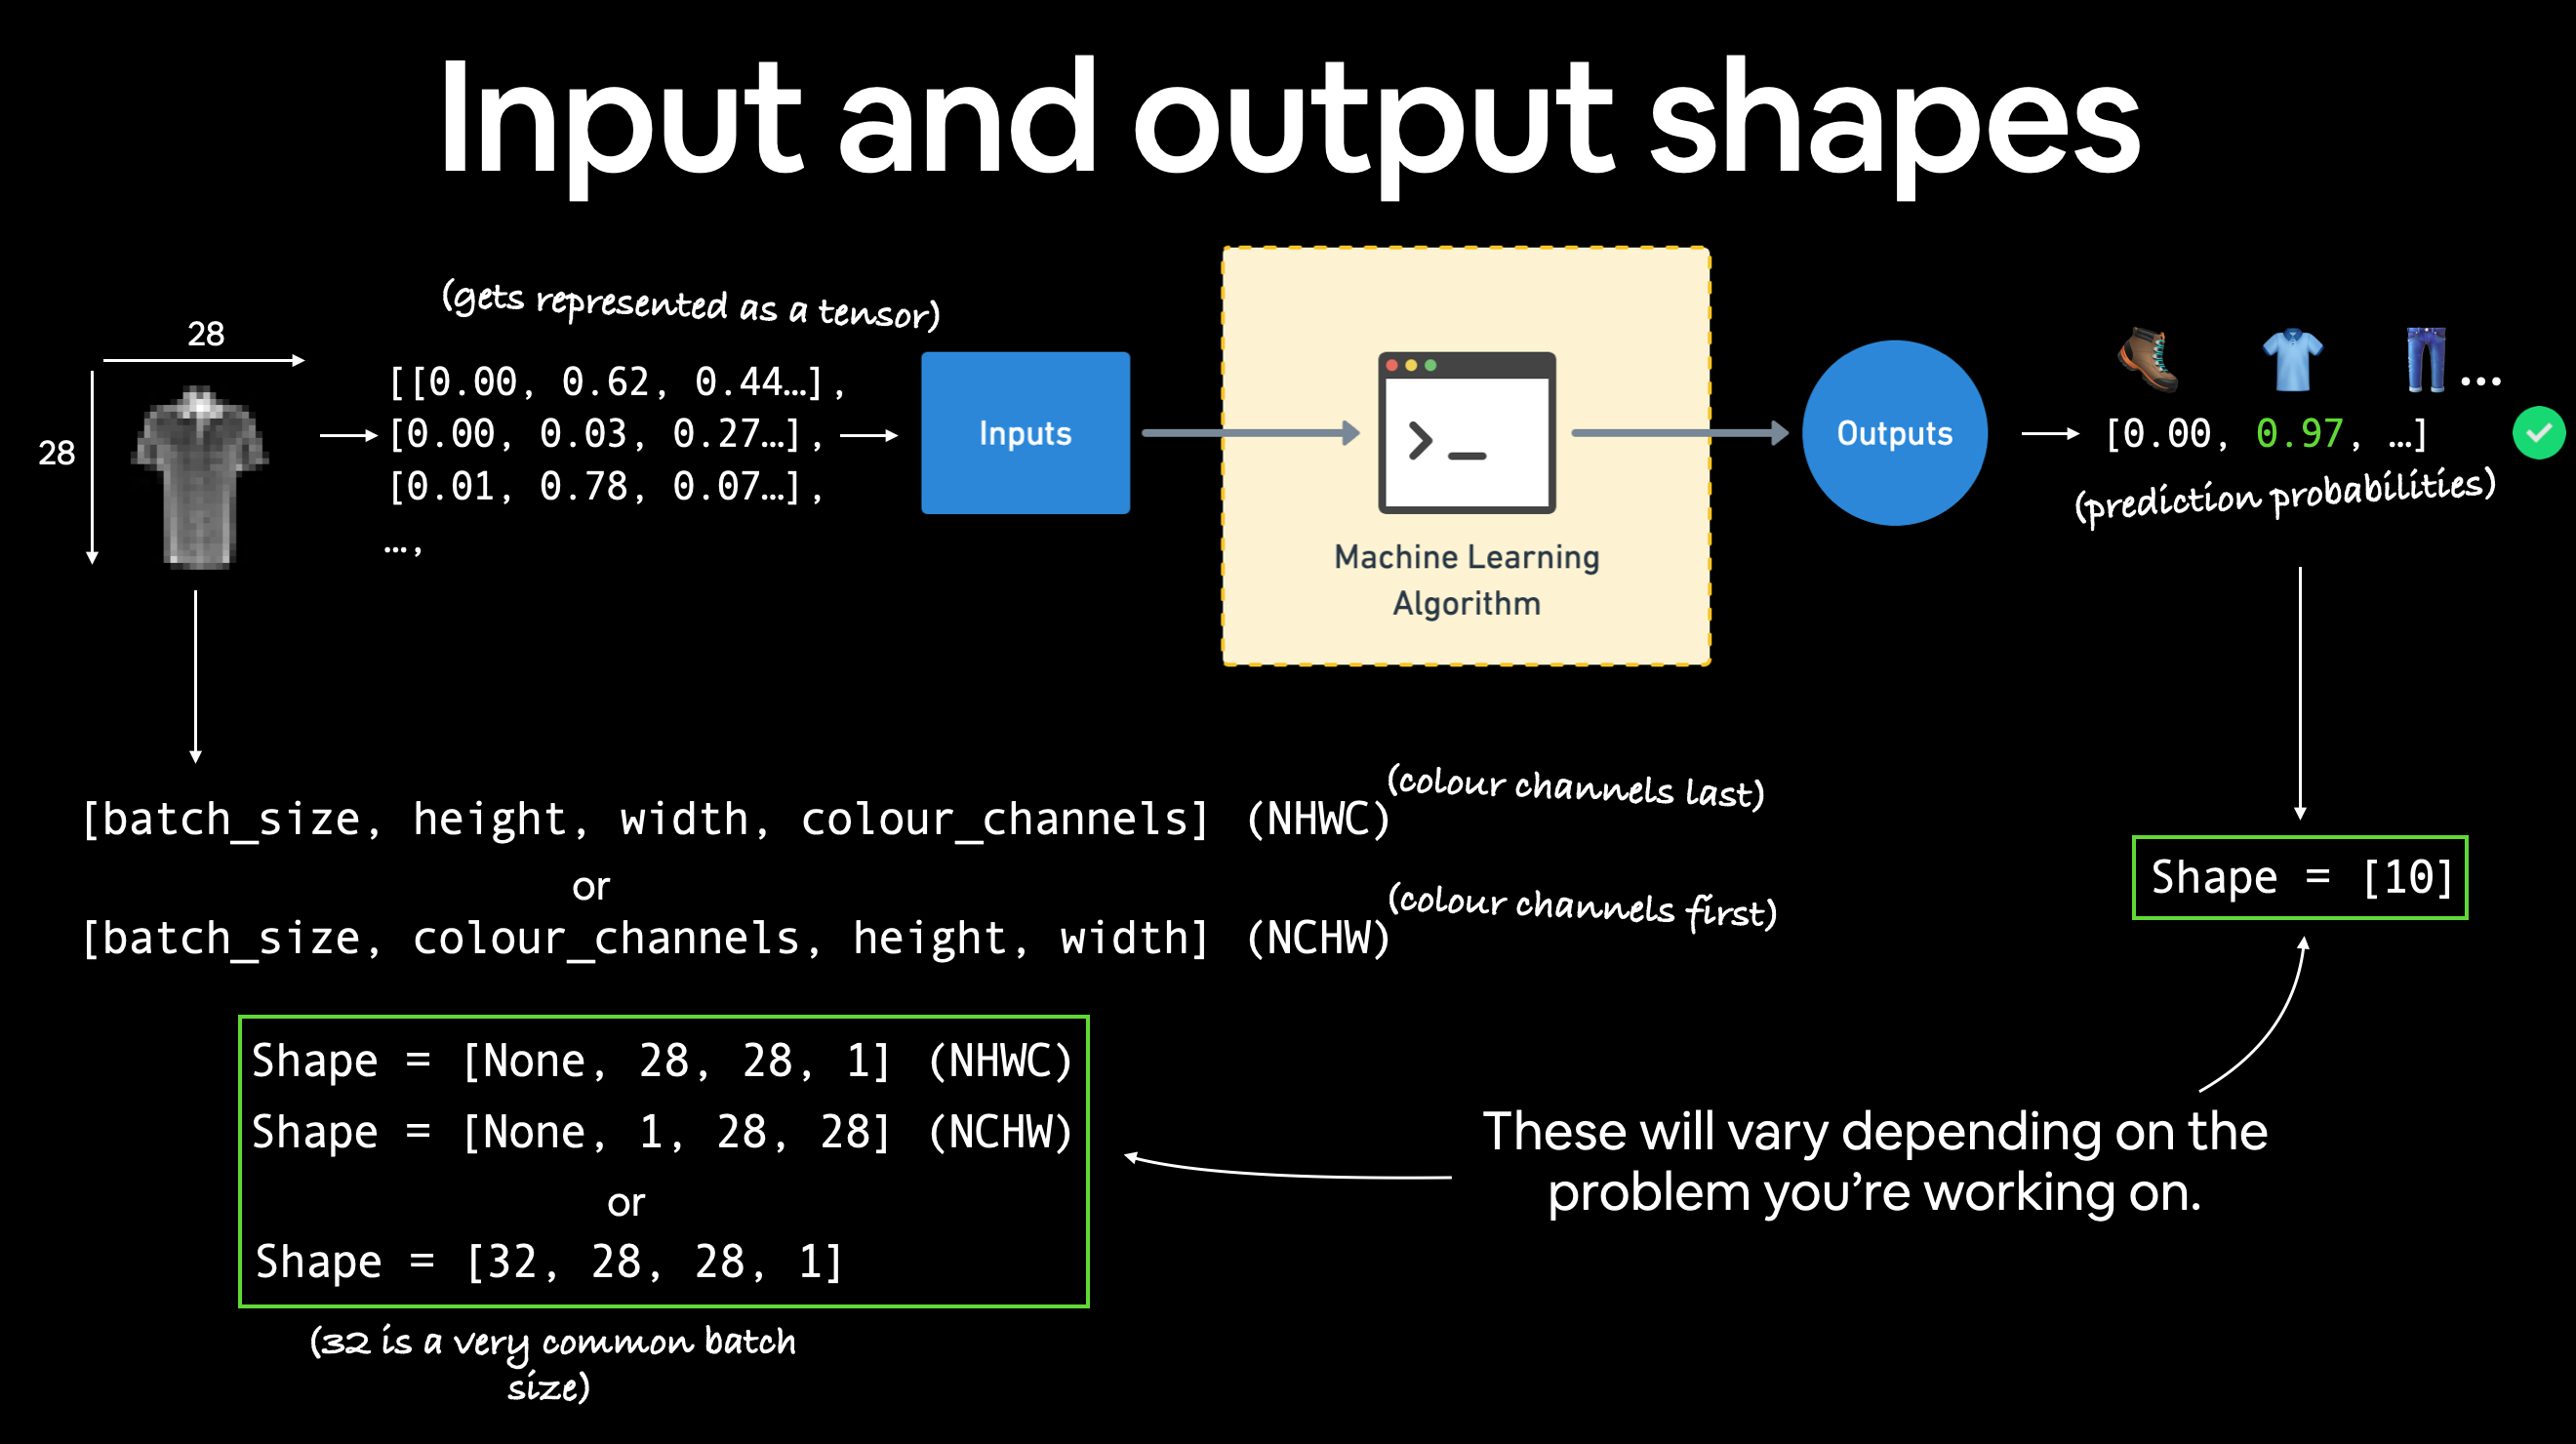

In [1]:
import torch
import torchvision

from torch import nn
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

print(torch.__version__)
print(torchvision.__version__)

2.8.0
0.23.0


In [2]:
import matplotlib.pyplot as plt

__Getting DataSet -- MNIST Fashion__

In [3]:
train_data  = datasets.FashionMNIST(
    root = "data", #location to download data
    train = True,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
)

test_data  = datasets.FashionMNIST(
    root = 'data', #location to download data
    train = False,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
)

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
print(train_data.classes)
print(train_data.class_to_idx)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [7]:
train_data[0][0].shape, train_data[0][1]

(torch.Size([1, 28, 28]), 9)

(-0.5, 27.5, 27.5, -0.5)

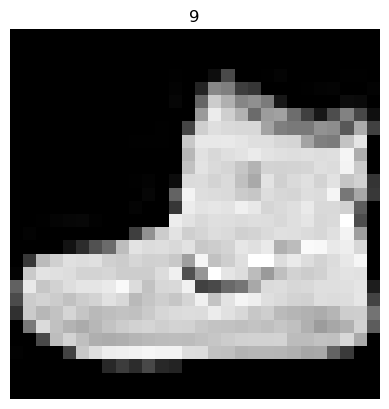

In [8]:
image, label = train_data[0]
plt.imshow(image.squeeze(), cmap='gray')
plt.title(label)
plt.axis(False)

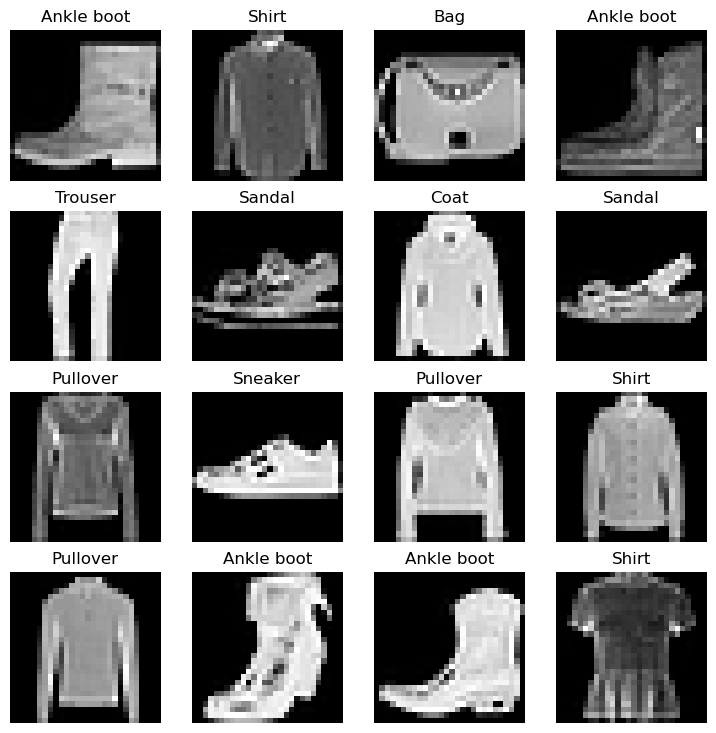

In [9]:
class_name = train_data.classes

torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_name[label])
    plt.axis(False)

__Prepare DataLoader__

In [10]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [11]:
from torch.utils.data import DataLoader


BATCH_SIZE  = 32 


train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True
                            )

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False
                              )

In [12]:
train_dataloader, len(train_dataloader), 60000/32

(<torch.utils.data.dataloader.DataLoader at 0x1070fef30>, 1875, 1875.0)

In [13]:
feature, label_  = next(iter(train_dataloader))

feature.shape, label_.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

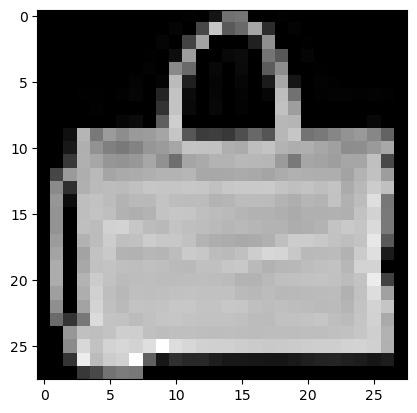

In [14]:
random_idx = torch.randint(0, len(feature), size=[1]).item()

img, label = feature[random_idx], label_[random_idx]
plt.imshow(img.squeeze(), cmap='gray')

### __Building Model :: CNN__

1. Input Layer
2. Convolutional Layer
3. Hidden Activation / Non-linear Activation
4. Pooling Layer
5. Output / Linear Layer
6. Output Activation

In [32]:
class FashionMNISTModel(nn.Module):

    """
    TinyVGG Model Architecture
    """

    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()

        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block1(x)
        x  = self.conv_block2(x)
        x = self.classifier(x)
        return x


In [33]:
torch.manual_seed(42)
model  = FashionMNISTModel(input_shape=1,
                           hidden_units=10,
                           output_shape=len(class_name))

In [17]:
model

FashionMNISTModel(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [18]:
model.state_dict()

OrderedDict([('conv_block1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
       

In [34]:
model.parameters

<bound method Module.parameters of FashionMNISTModel(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)>

import requests
from pathlib import Path 
request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [20]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.1)

In [31]:
list(train_dataloader)[0][0].shape

torch.Size([32, 1, 28, 28])

In [40]:
# Creating Training and Testing Loop 

def training_step(model : torch.nn.Module,
                  data_loader : torch.utils.data.dataloader,
                  loss_fn : torch.nn.Module,
                  optimizer : torch.optim.Optimizer,
                  accuracy_fn,
                  ):
    train_loss, train_acc = 0, 0
    for batch, (X,y) in enumerate(data_loader):
        y_pred = model(X) # forward pass

        loss = loss_fn(y_pred, y) # calculating loss 
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss /= len(data_loader)
        train_acc /= len(data_loader)
        print(f'train loss {train_loss} | train accuracy {train_acc}')


def test_step(model : torch.nn.Module,
              data_loader : torch.utils.data.dataloader,
              loss_fn : torch.nn.Module,
              accuracy_fn,
              ):
        test_loss, test_acc = 0, 0

        model.eval()
        with torch.inference_mode():
            for X,y in data_loader:
             test_pred = model(X) # forward pass
             
             test_loss += loss_fn(test_pred, y) # calculating loss 
             test_acc += accuracy_fn(y_true=y,
                                 y_pred=test_pred.argmax(dim=1))
        
             test_loss /= len(data_loader)
             test_acc /= len(data_loader)
             print(f'train loss {test_loss} | train accuracy {test_acc}')        

In [41]:
# Training and Testing Model 

from tqdm.auto import tqdm

epochs = 3
for epoch in tqdm(range(epochs)):
    print(epoch)

    training_step(model,
                  train_dataloader,
                  loss_fn,
                  optimizer,
                  accuracy_fn)
    
    test_step(model,
              test_dataloader,
              loss_fn,
              accuracy_fn)

  0%|          | 0/3 [00:00<?, ?it/s]

0
train loss 0.0012285446282476187 | train accuracy 0.006666666666666667
train loss 0.0012315519852563739 | train accuracy 0.0016702222222222222
train loss 0.0012291043531149626 | train accuracy 0.003334224118518518
train loss 0.0012264440301805735 | train accuracy 0.00500177825286321
train loss 0.0012288724537938833 | train accuracy 0.003336000948401527
train loss 0.0012252851156517863 | train accuracy 0.005001779200505814
train loss 0.0012325677089393139 | train accuracy 0.006669334282240269
train loss 0.0012253731256350875 | train accuracy 0.008336890311617195
train loss 0.0012308508157730103 | train accuracy 0.006671113008166195
train loss 0.001230565132573247 | train accuracy 0.006670224593604355
train loss 0.0012316822540014982 | train accuracy 0.005003557453116589
train loss 0.0012310603633522987 | train accuracy 0.003336001897308329
train loss 0.0012298027286306024 | train accuracy 0.008335112534345232
train loss 0.0012252639280632138 | train accuracy 0.0050044453933516505
trai

In [42]:
# Seting up evaluation code 

def eval_model(model : torch.nn.Module,
                  data_loader : torch.utils.data.dataloader,
                  loss_fn : torch.nn.Module,
                  accuracy_fn):
    
    loss, acc = 0 , 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y, y_pred=y_pred.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {

        "model name" : model.__class__.__name__,
        "model loss" : loss.item(),
        "model acc"  : acc
    }    

In [43]:
model_results = eval_model(model,
                           test_dataloader,
                           loss_fn,
                           accuracy_fn)

model_results

{'model name': 'FashionMNISTModel',
 'model loss': 2.3023064136505127,
 'model acc': 9.994009584664537}

__Making Prediction on Random Test Data__

9
Ankle boot


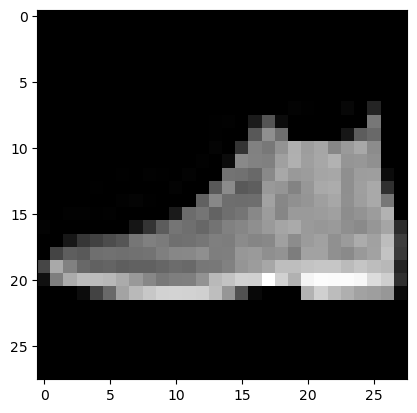

In [73]:
print(test_data[0][1])
print(class_name[9])
plt.imshow(test_data[0][0].squeeze(), cmap='gray')

In [71]:
single_pred = model(torch.unsqueeze(test_data[0][0], dim=0))
print(single_pred)
pred_prob = torch.softmax(single_pred.squeeze(), dim=0) 
print(pred_prob)
print(pred_prob.argmax())

tensor([[ 0.0273, -0.0607,  0.0553, -0.0283, -0.0152,  0.0129, -0.0052, -0.0085,
          0.0231,  0.0124]], grad_fn=<AddmmBackward0>)
tensor([0.1026, 0.0939, 0.1055, 0.0970, 0.0983, 0.1011, 0.0993, 0.0990, 0.1022,
        0.1011], grad_fn=<SoftmaxBackward0>)
tensor(2)


In [82]:
def make_predictions(model : torch.nn.Module,
                     data : list):
    
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0)
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            pred_probs.append(pred_prob)
    return torch.stack(pred_probs)
            

In [78]:
import random
random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k = 9):
    test_samples.append(sample)
    test_labels.append(label)

print(f'Test Sample Size is {test_samples[0].shape} \nTest Sample Label {test_labels[0]}')


Test Sample Size is torch.Size([1, 28, 28]) 
Test Sample Label 5


In [80]:
len(test_samples)

9

In [84]:
pred_probs = make_predictions(model, test_samples)
pred_probs[:1]

tensor([[0.1030, 0.0933, 0.1060, 0.0963, 0.0985, 0.1013, 0.0995, 0.0991, 0.1020,
         0.1010]])

In [85]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2])

In [86]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

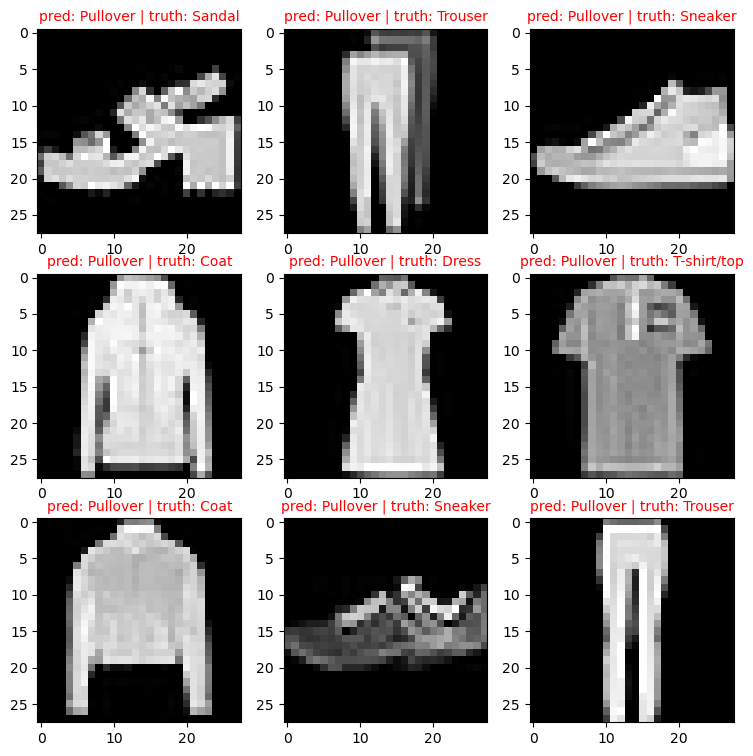

In [101]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(sample.squeeze(), cmap='gray')
    pred_label = class_name[pred_classes[i]]
    truth_label = class_name[test_labels[i]]

    title_text = f"pred: {pred_label} | truth: {truth_label}"

    if pred_label == truth_label:
        plt.title(title_text, fontsize = 10 ,c = 'b')
    else:
        plt.title(title_text, fontsize = 10, c='r')


In [105]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

In [108]:
# Making Predictions on all the test data

y_preds = []
model.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc='Making Predictions'):
        y_logit = model(X)
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
        y_preds.append(y_pred)

y_pred_tensor = torch.cat(y_preds)

Making Predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [113]:
len(y_pred_tensor), len(test_data.targets)

(10000, 10000)

!pip install torchmetrics

In [117]:
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [118]:
from torchmetrics import ConfusionMatrix

confmat = ConfusionMatrix(num_classes = len(class_name), 
                          task = 'multiclass')

confmat_tensor = confmat(preds = y_pred_tensor, target= test_data.targets)

In [119]:
confmat_tensor

tensor([[   0,    0, 1000,    0,    0,    0,    0,    0,    0,    0],
        [   0,    0, 1000,    0,    0,    0,    0,    0,    0,    0],
        [   0,    0, 1000,    0,    0,    0,    0,    0,    0,    0],
        [   0,    0, 1000,    0,    0,    0,    0,    0,    0,    0],
        [   0,    0, 1000,    0,    0,    0,    0,    0,    0,    0],
        [   0,    0, 1000,    0,    0,    0,    0,    0,    0,    0],
        [   0,    0, 1000,    0,    0,    0,    0,    0,    0,    0],
        [   0,    0, 1000,    0,    0,    0,    0,    0,    0,    0],
        [   0,    0, 1000,    0,    0,    0,    0,    0,    0,    0],
        [   0,    0, 1000,    0,    0,    0,    0,    0,    0,    0]])

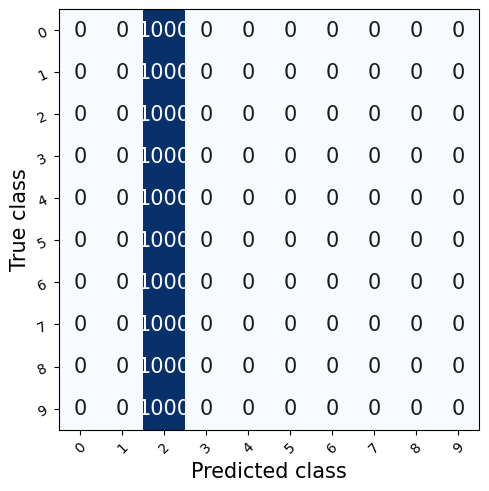

In [127]:
confmat.plot(cmap="Blues")
plt.show()

__Saving Model__